<a href="https://colab.research.google.com/github/SantiFerna/TP-CoderHouse/blob/main/ProyectoDSParteI%2BFernandezSantiago.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción

El presente trabajo indagará una base de clientes de un banco para poder determinar qué variables podrían estar influyendo a la hora de explicar el abandono o fuga de clientes del banco. Primeramente, se presentará el dataset elegido para trabajar, luego se determinará la pregunta problema y los objetivos que guían el trabajo, y posteriormente se procederá a analizar la información y ofrecer algunas conclusiones preliminares.

# Sobre el dataset elegido

**Sobre el dataset**

El dataset elegido para el presente trabajo es el de "Bank Customer Churn", publicado por Radheshyam Kollipara el 26/04/2024 en la plataforma Kaggle.

El mismo es un csv que contiene 10.000 filas y 18 columnas que contiene información sobre la rotación de clientes de un banco.

A continuación, se presenta un diccionario de las variables que contiene, el cual se encontraba en la descripción de la publicación del set de datos y es de gran ayudará para comprender la información que contiene el mismo.

- **RowNumber** (Número de fila): corresponde al número de registro (fila) y no afecta el resultado.
- **CustomerId** (Id. de cliente): contiene valores aleatorios y no afecta la salida del cliente del banco.
- **Surname** (Apellido): el apellido de un cliente no influye en su decisión de dejar el banco.
- **CreditScore** (Puntuación crediticia): puede afectar la pérdida de clientes, ya que un cliente con una puntuación crediticia más alta tiene menos probabilidades de dejar el banco.
- **Geography** (Geografía): la ubicación de un cliente puede afectar su decisión de dejar el banco.
- **Gender** (Género): es interesante explorar si el género influye en la pérdida de un cliente del banco.
- **Age** (Edad): esto es relevante, ya que los clientes de mayor edad tienen menos probabilidades de dejar el banco que los más jóvenes.
- **Staying** (Antigüedad): se refiere a la cantidad de años que el cliente lleva siendo cliente del banco. Normalmente, los clientes de mayor edad son más fieles y tienen menos probabilidades de dejar el banco.
- **Balance** (Saldo): también es un buen indicador de la pérdida de clientes, ya que las personas con un saldo mayor en sus cuentas tienen menos probabilidades de dejar el banco que aquellas con saldos menores.
- **NumOfProducts**: se refiere a la cantidad de productos que un cliente ha comprado a través del banco.
- **HasCrCard**: indica si un cliente tiene o no tarjeta de crédito. Esta columna también es relevante, ya que las personas con tarjeta de crédito tienen menos probabilidades de abandonar el banco.
- **IsActiveMember**: los clientes activos tienen menos probabilidades de abandonar el banco.
estimatesalary: al igual que con balance, las personas con salarios más bajos tienen más probabilidades de abandonar el banco en comparación con las personas con salarios más altos.
- **Exited**: si el cliente abandonó o no el banco.
- **Complaint**: el cliente tiene o no una queja.
- **Satisfaction Score**: puntaje proporcionado por el cliente para la resolución de su queja.
- **Card Type**: tipo de tarjeta que posee el cliente.
- **Points Earned**: los puntos ganados por el cliente por usar tarjeta de crédito.

Fuente: https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn/data

# Pregunta problema y objetivos

En el presente trabajo se buscará explorar el dataset elegido a fin de poder identitificar qué variables o factores podrían estar influyendo en la rotación o fuga de clientes del banco analizado.

Generalmente, las estrategias comerciales de las entidades bancarias buscan retener a sus clientes la mayor cantidad de tiempo posible, dado que es más costoso dar de alta a un nuevo cliente que mantener uno existente.

En ese sentido, los posibles motivos que llevan a un cliente a abandonar la empresa constituyen un insumo de gran importancia a la hora de tomar decisiones y establecer estrategias comerciales tendientes a fidelizar clientes y motorizar campañas de retención para evitar la fuga de los mismos.

La pregunta problema que guía este trabajo, entonces, es la de **¿qué factores influyen para que un cliente decida abandonar el banco?**

De esta forma, los **objetivos** que se desprenden de esta pregunta problema son:
- Indagar la información disponible y transformar los datos para su correcto análisis.
- Analizar y graficar relaciones entre las variables que permitan dar cuenta de la relación que tienen con el abandono de la empresa.

# Qué muestran los datos

In [69]:
# Importación de librerías
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [70]:
# Setear el path
drive.mount('/content/gdrive')
os.chdir("/content/gdrive/My Drive/Curso - Ciencia de Datos con Python/")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [71]:
# Importar el csv que utilizaremos
df = pd.read_csv('Customer-Churn-Records.csv')

Procedemos a explorar el set de datos para ver qué información trae y si es necesario realizar transformaciones que permitan su procesamiento posterior

In [72]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

Vemos que el set de datos no presenta valores nulos. Cabría indagar si posee valores erróneos, que podrían ser tratados como valores nulos al avanzar con el análisis.

Para facilitar su interpretación, procedemos a traducir los nombres de las variables.

In [75]:
# Traducimos los nombres de las variables para facilitar su interpretación
traduccion_dict = {
    'RowNumber': 'NumeroFila',
    'CustomerId': 'IdCliente',
    'Surname': 'Apellido',
    'CreditScore': 'ScoreCrediticio',
    'Geography': 'PaisOrigen',
    'Gender': 'Genero',
    'Age': 'Edad',
    'Tenure': 'Antiguedad',
    'Balance': 'SaldoDisponible',
    'NumOfProducts': 'NumProductos',
    'HasCrCard': 'TieneTarjetaCredito',
    'IsActiveMember': 'EsMiembroActivo',
    'EstimatedSalary': 'SalarioEstimado',
    'Exited': 'Fugado',
    'Complain': 'Queja',
    'Satisfaction Score': 'ScoreSatisfaccion',
    'Card Type': 'TipoTarjeta',
    'Point Earned': 'PuntosAcumulados'
}

df2 = df.rename(columns=traduccion_dict)

In [76]:
df2.sample(3)

,NumeroFila,IdCliente,Apellido,ScoreCrediticio,PaisOrigen,Genero,Edad,Antiguedad,SaldoDisponible,NumProductos,TieneTarjetaCredito,EsMiembroActivo,SalarioEstimado,Fugado,Queja,ScoreSatisfaccion,TipoTarjeta,PuntosAcumulados
3552,3553,15730161,Marcelo,833,France,Female,39,3,0.00,2,1,0,1710.89,0,0,1,DIAMOND,779
4925,4926,15790282,Trentino,817,Germany,Male,58,3,114327.59,2,1,1,42831.11,0,0,3,DIAMOND,262
1446,1447,15680855,Iloabuchi,637,France,Male,33,2,145731.83,1,0,1,109219.43,0,0,4,SILVER,721


Procedemos a indagar sobre la distribución de los valores hacia el interior del dataset.

In [77]:
df2.describe()

,NumeroFila,IdCliente,ScoreCrediticio,Edad,Antiguedad,SaldoDisponible,NumProductos,TieneTarjetaCredito,EsMiembroActivo,SalarioEstimado,Fugado,Queja,ScoreSatisfaccion,PuntosAcumulados
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [78]:
# Display the unique values in the 'Fugado' column
print(df2['Fugado'].unique())

# Display the value counts for each unique value in the 'Fugado' column
print(df2['Fugado'].value_counts())


[1 0]
Fugado
0    7962
1    2038
Name: count, dtype: int64


Vemos que la variable de interés en nuestro análisis (dependiente) es binaria, es decir, tiene campos 0 y 1, donde 1 indica que ese cliente se fugó.

Antes de proceder a graficar, analizamos la distribución de las variables nominales que pueden jugar un papel importante en el análisis de fuga de clientes del banco.

In [79]:
# Distribución porcentual de Género
df2['Genero'].value_counts(normalize=True) * 100


,proportion
Genero,
Male,54.57
Female,45.43


In [80]:
# Distribución porcentual de País
df2['PaisOrigen'].value_counts(normalize=True) * 100

,proportion
PaisOrigen,
France,50.14
Germany,25.09
Spain,24.77


In [81]:
# Distribución porcentual de País
df2['TipoTarjeta'].value_counts(normalize=True) * 100

,proportion
TipoTarjeta,
DIAMOND,25.07
GOLD,25.02
SILVER,24.96
PLATINUM,24.95


Buscamos inconsistencias o errores vinculados con la recolección de información

In [82]:
# Variables donde 0 podría ser un problema
variables_a_chequear = ['NumeroFila', 'IdCliente', 'ScoreCrediticio', 'Edad', 'Antiguedad', 'SaldoDisponible', 'NumProductos', 'TieneTarjetaCredito', 'EsMiembroActivo', 'SalarioEstimado', 'Fugado', 'Queja', 'ScoreSatisfaccion', 'PuntosAcumulados']

for col in variables_a_chequear:
    print(f"{col}: {sum(df2[col] == 0)} registros con valor 0")

NumeroFila: 0 registros con valor 0
IdCliente: 0 registros con valor 0
ScoreCrediticio: 0 registros con valor 0
Edad: 0 registros con valor 0
Antiguedad: 413 registros con valor 0
SaldoDisponible: 3617 registros con valor 0
NumProductos: 0 registros con valor 0
TieneTarjetaCredito: 2945 registros con valor 0
EsMiembroActivo: 4849 registros con valor 0
SalarioEstimado: 0 registros con valor 0
Fugado: 7962 registros con valor 0
Queja: 7956 registros con valor 0
ScoreSatisfaccion: 0 registros con valor 0
PuntosAcumulados: 0 registros con valor 0


In [83]:
categoricas = ['Genero', 'PaisOrigen', 'TipoTarjeta']

for col in categoricas:
    print(f"Valores únicos en {col}:")
    print(df2[col].unique())
    print()

Valores únicos en Genero:
['Female' 'Male']

Valores únicos en PaisOrigen:
['France' 'Spain' 'Germany']

Valores únicos en TipoTarjeta:
['DIAMOND' 'GOLD' 'SILVER' 'PLATINUM']



Procedemos a realizar el primer gráfico, un boxplot, para poder ver más en detalle la distribución de cada variable y poder detectar valores atípicos.

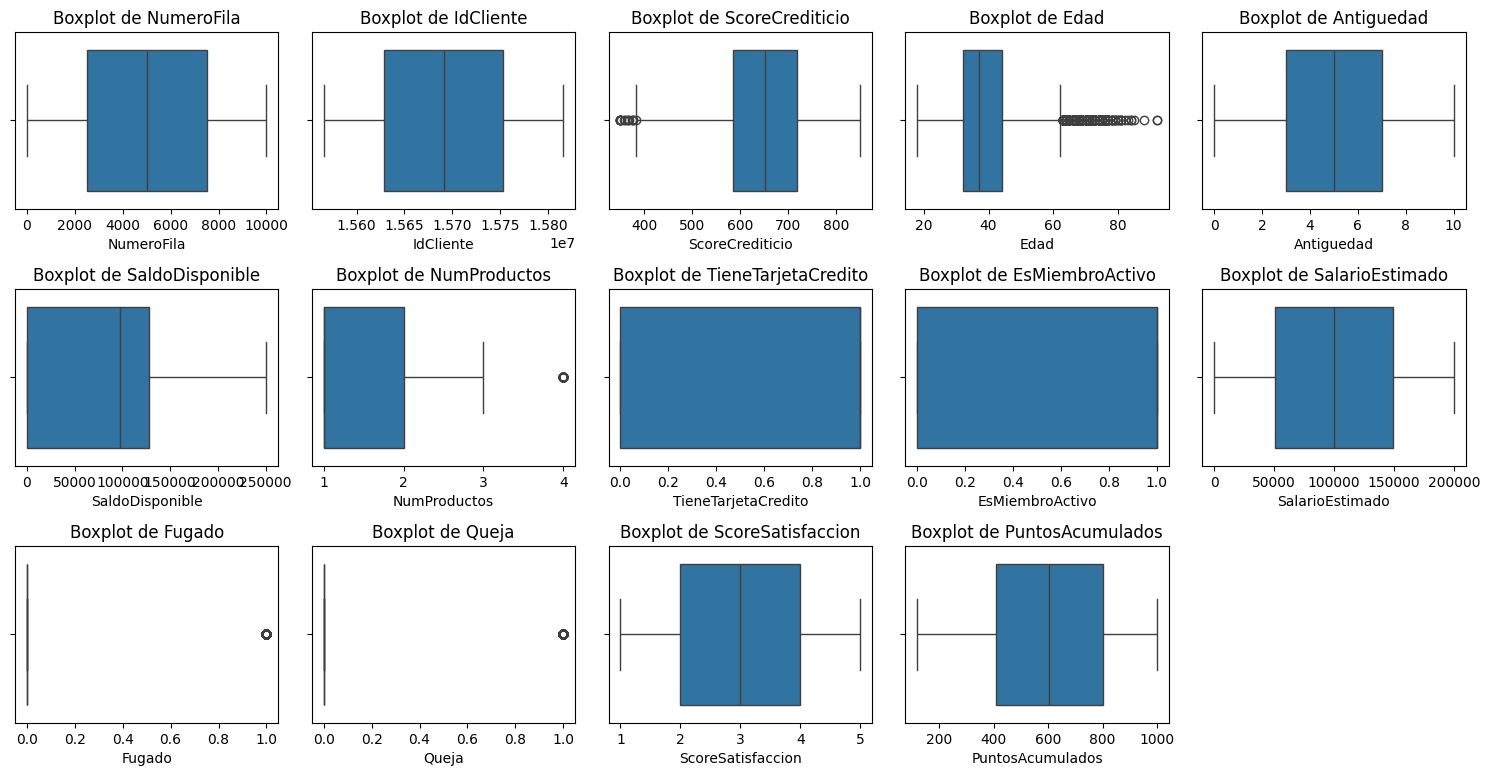

In [84]:
# Seleccionar solo las columnas numéricas
numerical_cols = df2.select_dtypes(include=[float, int]).columns

# Graficar
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 5, i+1)
    sns.boxplot(data=df2, x=col)
    plt.title(f"Boxplot de {col}")
    plt.tight_layout()

plt.show()

Vemos que las variables ScoreCrediticio, Edad y NumProductos presentan outliers, algo que tenemos que tener en cuenta cuando profundicemos el análisis.

Procedemos a analizar qué variables correlacionan con la variable Fugado, para luego poder hacer un doble click en ese vínculo.

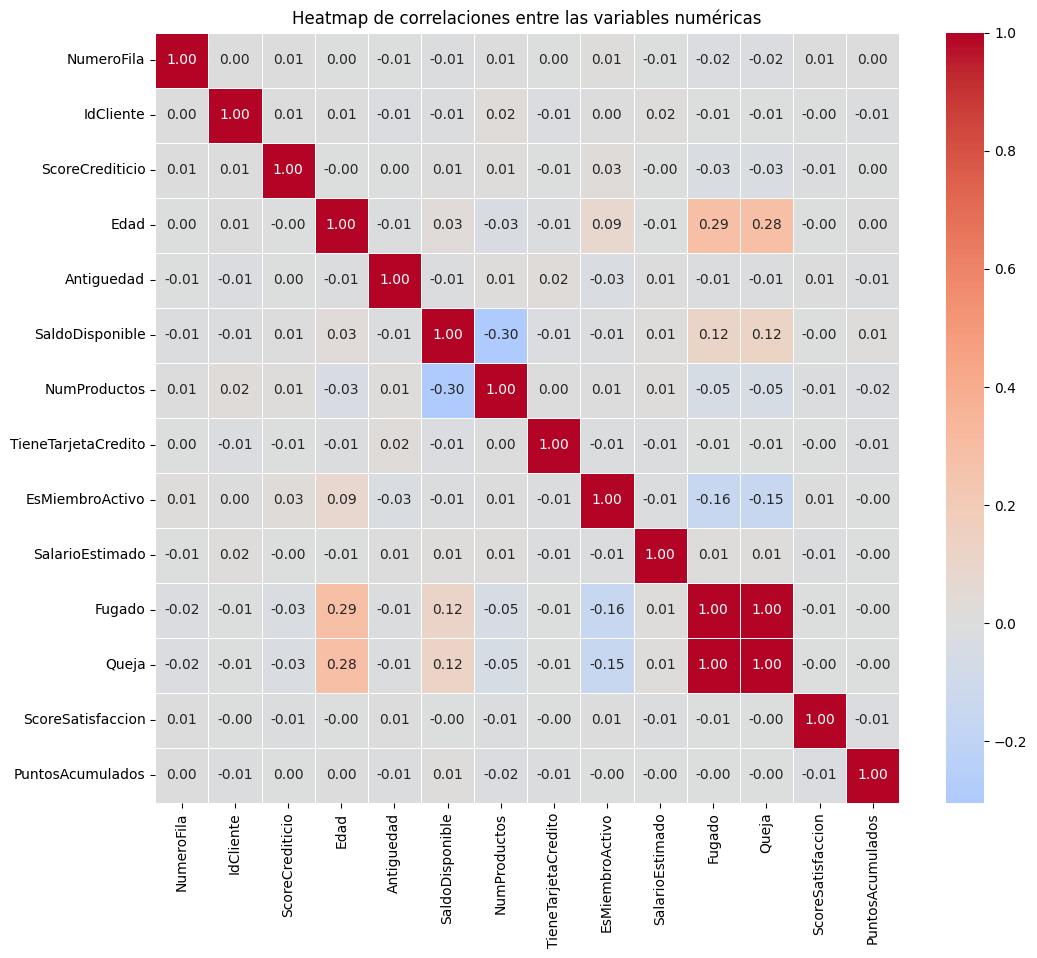

In [85]:
# Calcula la matriz de correlaciones
matriz_correlacion = df2.corr(numeric_only=True)

# Heatmap de la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, center=0)
plt.title('Heatmap de correlaciones entre las variables numéricas')
plt.show()


El mapa de calor con la matriz de correlaciones nos muestra que la variable edad tiene una correlación positiva de 0.29 con Fugado, lo que indica que a mayor edad, mayor probabilidad de que un cliente se fugue.

También destaca EsMiembroActivo que tiene una correlación negativa de -0.16 con Fugado, lo que implica que los clientes activos tienen menor probabilidad de fugarse.

Por otro lado, Queja tiene una correlación positiva de 1 con Fugado, sugiriendo que las probabilidades de fuga de un cliente que se quejó son prácticamente del 100%. Esto es extraño, podría indicar que hay un error en el dataset.


In [86]:
diferencias = df2[df2['Fugado'] != df2['Queja']]
print(len(diferencias))

14


In [87]:
igualdades = df2[df2['Fugado'] == df2['Queja']]
print(len(igualdades))

9986


Sin embargo, vemos que hay 14 registros que no son idénticos.

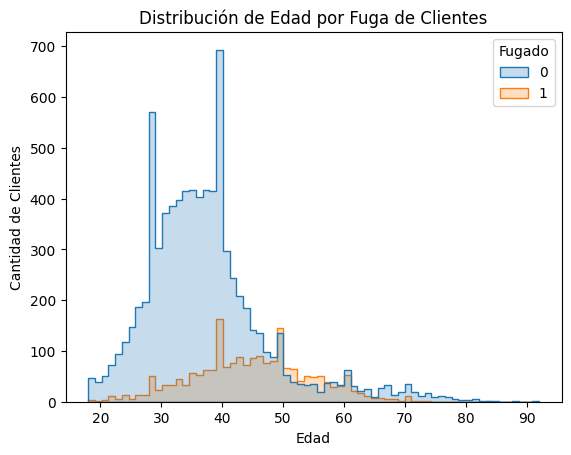

In [89]:
# Crear el histograma
sns.histplot(data=df2, x='Edad', hue='Fugado', element='step')  # element='step' para evitar barras superpuestas

plt.title('Distribución de Edad por Fuga de Clientes')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Clientes')

plt.show()

Al graficar en un histograma la relación entre la Edad y la Fuga, vemos que el abandono del banco tiende a concentrarse en edades más elevadas, lo cual se condice a su vez con el descenso de clientes en esos rangos etarios.

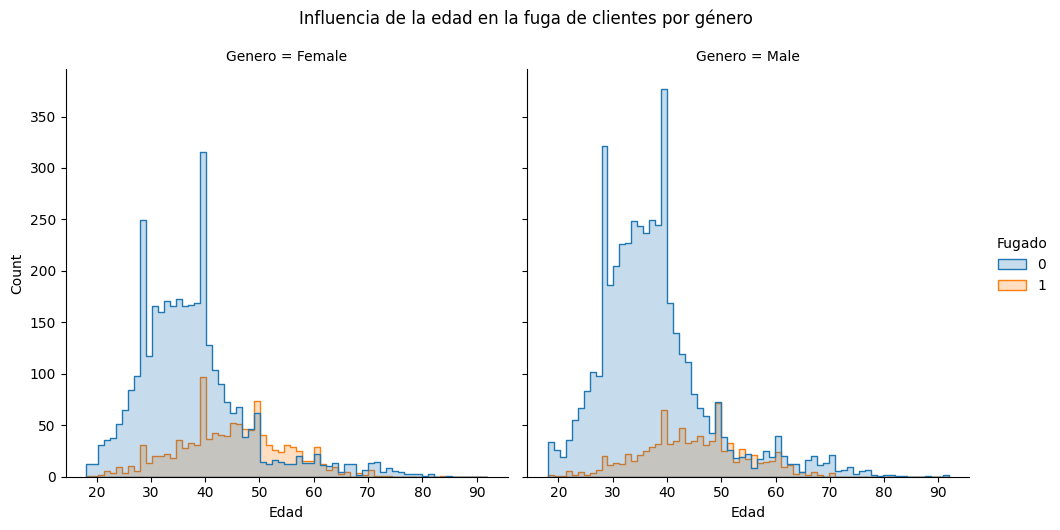

In [91]:
sns.displot(data=df2, x='Edad', hue='Fugado', element='step', col='Genero')

plt.suptitle('Influencia de la edad en la fuga de clientes por género', y=1.05)
plt.show()

Al introducir la varible género, vemos que las mujeres tienen una mayor fuga que los varones y al verlo por edad, podemos visualizar que es más elevada en mujeres en edades más elevadas.

In [92]:
fugados_df = df2[df2['Fugado'] == 1]

porcentaje_fugados_genero = fugados_df.groupby('Genero')['Fugado'].count() / len(fugados_df) * 100

print(porcentaje_fugados_genero)

Genero
Female    55.888126
Male      44.111874
Name: Fugado, dtype: float64


Como podemos ver, las mujeres explican el 55% de la fuga, mientras que los hombre solo el 44%. Si volvemos a ver la información de las distribución por género, casi el 55% de los clientes eran hombres. Es decir, hay más clientes hombres y las que más se fugan son mujeres.

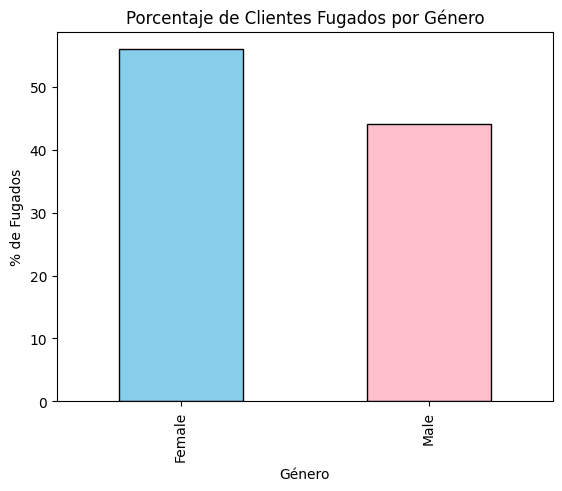

In [93]:
porcentaje_fugados_genero.plot(kind='bar', color=['skyblue', 'pink'], edgecolor='black')
plt.title('Porcentaje de Clientes Fugados por Género')
plt.ylabel('% de Fugados')
plt.xlabel('Género')
plt.show()

Finalmente, indagaremos sobre otra variable nominal que puede llegar a tener influencia en la fuga de clientes: PaisOrigen.

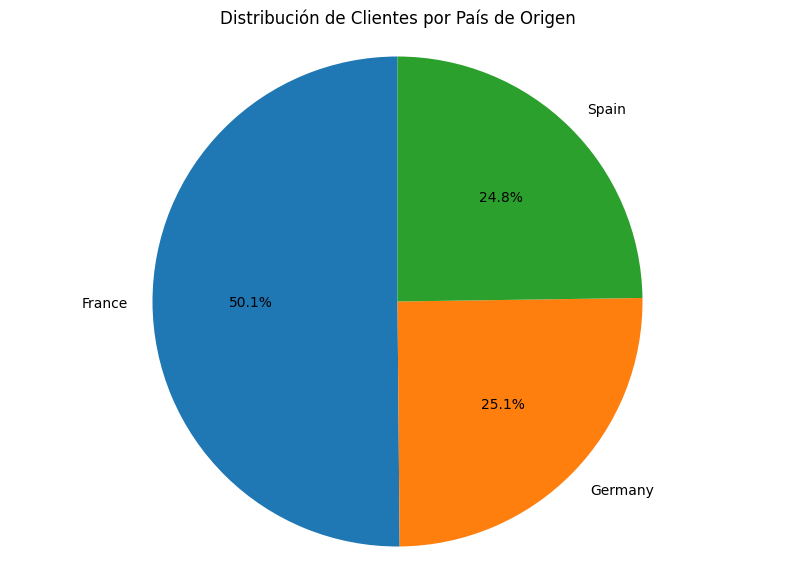

In [94]:
pais_origen_counts = df2['PaisOrigen'].value_counts()

fig, ax = plt.subplots(figsize=(10, 7))
ax.pie(pais_origen_counts, labels=pais_origen_counts.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.title('Distribución de Clientes por País de Origen')
plt.show()

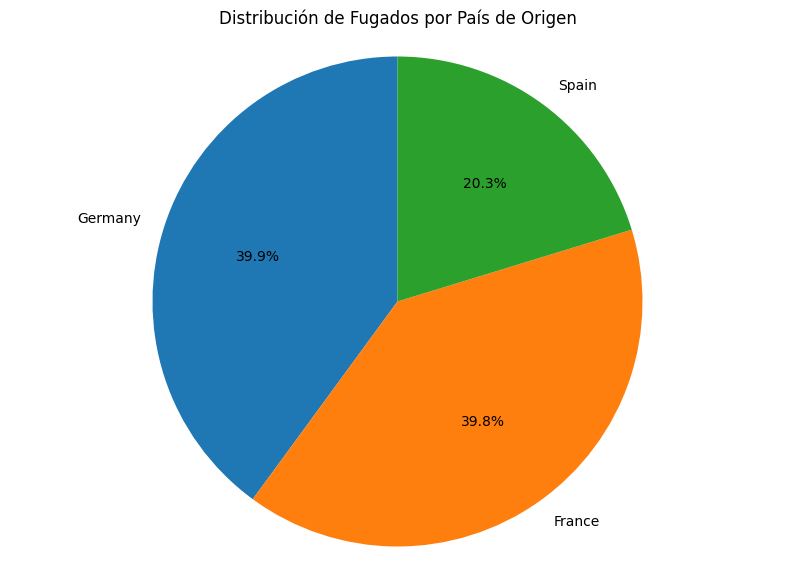

In [95]:
fugados_df = df2[df2['Fugado'] == 1]
pais_origen_counts2 = fugados_df['PaisOrigen'].value_counts()

fig, ax = plt.subplots(figsize=(10, 7))
ax.pie(pais_origen_counts2, labels=pais_origen_counts2.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.title('Distribución de Fugados por País de Origen')
plt.show()

A través de los gráficos de torta, podemos ver que la proporción de clientes que se fugan aumenta considerablemente en los clientes que son de Alemania, mientras que desciende en los de Francia.

# Conclusiones preliminares

La breve ejercitación del presente trabajo nos permitió dar cuenta de algunas variables que podrían estar influyendo en la fuga de los clientes, información de gran importancia para que el banco tome acciones comerciales tendientes a disminuir la salida de estos clientes.

Por un lado, se divisó que la edad es la variable que mayor correlaciona con la fuga de clientes. En ese sentido, la salida de clientes aumenta en los clientes mayores en relación a los de menor edad.

Por otro lado, el género también juega un rol importante, donde encontramos que el porcentaje de mujeres que abandona el banco es mayor que el de hombres y, en línea con lo visualizado con la variable edad, las mujeres mayores lo hacen en mayor medida.

Finalmente, el país de origen es otra variable que tiene un peso importante en el análisis, ya que la fuga es proporcionalmente mayor en los clientes que son de Alemania.

Lo analizado permite realizar algunas aproximaciones para responder la pregunta problema y avanzar en la formulación de hipótesis que deberan contrastarse para ver si brindan información estadísticamente significativa.